In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
match_df = pd.read_csv('IPL_dataset/matches.csv')
deliveries_df = pd.read_csv('IPL_dataset/deliveries.csv')
ras_df = pd.read_csv('IPL_dataset/most_runs_average_strikerate.csv')

In [66]:
six_df = deliveries_df.loc[(deliveries_df['total_runs']==6) & (deliveries_df['extra_runs']==0)]
six_main_df = six_df.drop(['is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'player_dismissed', 'dismissal_kind', 'fielder', 'extra_runs', 'batsman_runs'], 1)


# MVP Batsman:

Checking for batsman with consistency in T20 format <br>
that is average greater than 30 and strike rate greater than 130

In [4]:
mvp_df = ras_df.loc[(ras_df['average']>=30) & (ras_df['strikerate']>=130)]

In [102]:
mvp_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
5,CH Gayle,4525,110,2972,41.136364,152.254374


# Impact Player
Checking for player with highest sr and descent avg for respectable amount of matches

In [6]:
ras_df.loc[(ras_df['average']>=25) & (ras_df['total_runs']>=500)].sort_values('strikerate', ascending = False).head()

,batsman,total_runs,out,numberofballs,average,strikerate
49,AD Russell,1415,41,752,34.512195,188.164894
38,RR Pant,1767,49,1071,36.061224,164.985994
103,CH Morris,519,20,327,25.950000,158.715596
64,HH Pandya,1082,38,689,28.473684,157.039187
20,V Sehwag,2728,98,1746,27.836735,156.242841


# Match Winner
   Player with most M.O.M

In [7]:
match_df.player_of_match.mode()[0]

'CH Gayle'

In [8]:
match_df.winner.mode()[0]  # Team with most wins

'Mumbai Indians'

In [9]:
match_df.city.mode()[0]  # City with most matches played

'Mumbai'

In [10]:
match_df.venue.mode()[0] # Venue with most matches played

'Eden Gardens'

In [11]:
match_df.sort_values('win_by_runs', ascending = False)['venue'].head() # Venue with highest win margins (runs)

43          Feroz Shah Kotla
619    M Chinnaswamy Stadium
59     M Chinnaswamy Stadium
556    M Chinnaswamy Stadium
410    M Chinnaswamy Stadium
Name: venue, dtype: object

In [12]:
match_df.sort_values('win_by_wickets', ascending = False)['venue'].head() # Venue with highest win margin (wickets)

119                                             Newlands
390           Punjab Cricket Association Stadium, Mohali
34     Punjab Cricket Association IS Bindra Stadium, ...
590               Saurashtra Cricket Association Stadium
71                            Dr DY Patil Sports Academy
Name: venue, dtype: object

# Bowlers Data
various data related to bowlers

In [29]:
dismissal_df = deliveries_df.dropna(subset=['player_dismissed'])

dismissal_df[dismissal_df.dismissal_kind!='run out']['bowler'].mode()[0]

'SL Malinga'

In [104]:
bowler_six_df = six_main_df['bowler'].value_counts().head()
bowler_six_df

PP Chawla          171
A Mishra           169
Harbhajan Singh    142
DJ Bravo           133
RA Jadeja          131
Name: bowler, dtype: int64

# Data Cleaning

In [42]:
match_df.drop('umpire3', 1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


# Data Visualization

## Pie Chart

### Bowlers Hit for most sixes

In [99]:
# define data

data = [171, 169, 142, 133, 131]
labels = ['Piyush Chawla', 'Amit Mishra', 'Harbhajan Singh', 'DJ Bravo', 'Ravindra jadeja']

In [95]:
# define seaborn color pallete

colors = sns.color_palette("Set2")

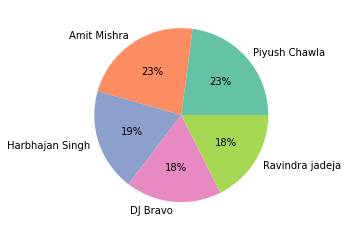

In [100]:
# create pie chart

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## Bar Graph

### MVP Batsman

In [108]:
mvp_df.drop(['out', 'numberofballs', 'average', 'strikerate'], 1).head()

,batsman,total_runs
0,V Kohli,5426
1,SK Raina,5386
2,RG Sharma,4902
3,DA Warner,4717
5,CH Gayle,4525


In [109]:
df = pd.DataFrame({'batsman':['Virat Kohli','Suresh Raina','Rohit Sharma','David Warner','Chris Gayle'], 
    'total_runs': [5426, 5386, 4902, 4717, 4525]})

In [117]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='total_runs', ylabel='batsman'>

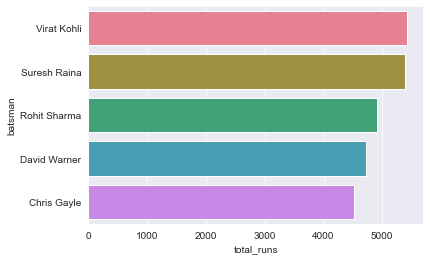

In [120]:
sns.barplot(x='total_runs', y='batsman', data=df, palette= 'husl')

In [121]:
# Impact player graph
# wickets data & graph
# venue graph
# boundaries by batsman graph
# boundaries by bowlers graph